In [54]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
import warnings; warnings.simplefilter('ignore')
pd.set_option('display.max_columns', None)

In [55]:
df = pd.read_csv("https://raw.githubusercontent.com/fantasydatapros/LearnPythonWithFantasyFootball/master/2023/07-Data%20Visualizations/03-Yearly%20Fantasy%20Stats%20-%202022.csv").iloc[:, 1:]

In [56]:
df.head()

,Player,Tm,Pos,Age,G,GS,Tgt,Rec,PassingYds,PassingTD,PassingAtt,PassingCmp,RushingYds,RushingTD,RushingAtt,ReceivingYds,ReceivingTD,Int,Fumbles,FumblesLost,2PM,2PP,FantasyPoints
0,Patrick Mahomes*+,KAN,QB,27,17,17,1,1,5250,41,648,435,358,4,61,6,0,12,5,0,1.0,2.0,417.4
1,Josh Jacobs*+,LVR,RB,24,17,17,64,53,0,0,0,0,1653,12,340,400,0,0,3,1,NaN,NaN,328.3
2,Christian McCaffrey*,2TM,RB,26,17,16,108,85,34,1,1,1,1139,8,244,741,5,0,1,0,NaN,NaN,356.4
3,Derrick Henry *,TEN,RB,28,16,16,41,33,4,1,2,2,1538,13,349,398,0,0,6,3,NaN,NaN,302.8
4,Justin Jefferson*+,MIN,WR,23,17,17,184,128,34,0,2,2,24,1,4,1809,8,0,0,0,1.0,NaN,368.7


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Player         650 non-null    object 
 1   Tm             650 non-null    object 
 2   Pos            578 non-null    object 
 3   Age            650 non-null    int64  
 4   G              650 non-null    int64  
 5   GS             650 non-null    int64  
 6   Tgt            650 non-null    int64  
 7   Rec            650 non-null    int64  
 8   PassingYds     650 non-null    int64  
 9   PassingTD      650 non-null    int64  
 10  PassingAtt     650 non-null    int64  
 11  PassingCmp     650 non-null    int64  
 12  RushingYds     650 non-null    int64  
 13  RushingTD      650 non-null    int64  
 14  RushingAtt     650 non-null    int64  
 15  ReceivingYds   650 non-null    int64  
 16  ReceivingTD    650 non-null    int64  
 17  Int            650 non-null    int64  
 18  Fumbles   

In [58]:
rb_df = df.loc[df["Pos"] == 'RB']
rb_df['Usage'] = rb_df['Tgt'] + rb_df['RushingAtt']
rb_df['Usage/G'] = rb_df['Usage'] / rb_df['G']
rb_df['FantasyPoints/G'] = rb_df['FantasyPoints'] / rb_df['G'] 
rb_df.head(10)

,Player,Tm,Pos,Age,G,GS,Tgt,Rec,PassingYds,PassingTD,PassingAtt,PassingCmp,RushingYds,RushingTD,RushingAtt,ReceivingYds,ReceivingTD,Int,Fumbles,FumblesLost,2PM,2PP,FantasyPoints,Usage,Usage/G,FantasyPoints/G
1,Josh Jacobs*+,LVR,RB,24,17,17,64,53,0,0,0,0,1653,12,340,400,0,0,3,1,NaN,NaN,328.3,404,23.764706,19.311765
2,Christian McCaffrey*,2TM,RB,26,17,16,108,85,34,1,1,1,1139,8,244,741,5,0,1,0,NaN,NaN,356.4,352,20.705882,20.964706
3,Derrick Henry *,TEN,RB,28,16,16,41,33,4,1,2,2,1538,13,349,398,0,0,6,3,NaN,NaN,302.8,390,24.375000,18.925000
5,Austin Ekeler,LAC,RB,27,17,17,127,107,0,0,0,0,915,13,204,722,5,0,5,3,NaN,NaN,372.7,331,19.470588,21.923529
9,Nick Chubb*,CLE,RB,27,17,17,37,27,0,0,0,0,1525,12,302,239,1,0,1,1,1.0,NaN,281.4,339,19.941176,16.552941
14,Saquon Barkley*,NYG,RB,25,16,16,76,57,0,0,0,0,1312,10,295,338,0,0,1,0,1.0,NaN,284.0,371,23.187500,17.750000
17,Jamaal Williams,DET,RB,27,17,9,16,12,0,0,0,0,1066,17,262,73,0,0,3,2,1.0,NaN,225.9,278,16.352941,13.288235
19,Tony Pollard*,DAL,RB,25,16,4,55,39,0,0,0,0,1007,9,193,371,3,0,0,0,NaN,NaN,248.8,248,15.500000,15.550000
20,Dalvin Cook*,MIN,RB,27,17,17,56,39,0,0,0,0,1173,8,264,295,2,0,4,4,NaN,NaN,237.8,320,18.823529,13.988235
21,Miles Sanders*,PHI,RB,25,17,15,26,20,0,0,0,0,1269,11,259,78,0,0,2,2,NaN,NaN,216.7,285,16.764706,12.747059


<Axes: xlabel='RushingAtt', ylabel='Tgt'>

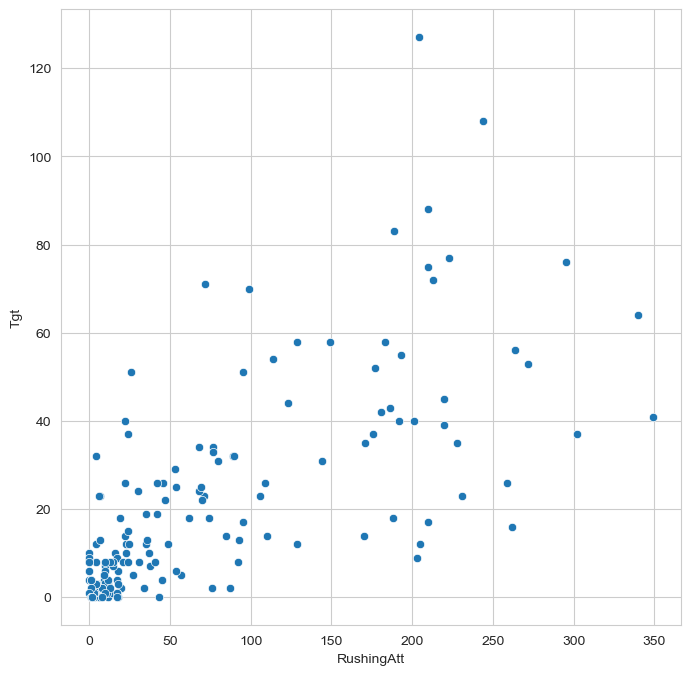

In [59]:
plt.figure(figsize=(8,8))
sns.set_style("whitegrid");
sns.scatterplot(x=rb_df['RushingAtt'], y=rb_df['Tgt'],)

Text(0.5, 1.0, 'Rushing Attempts vs Tgt - 2022 Season')

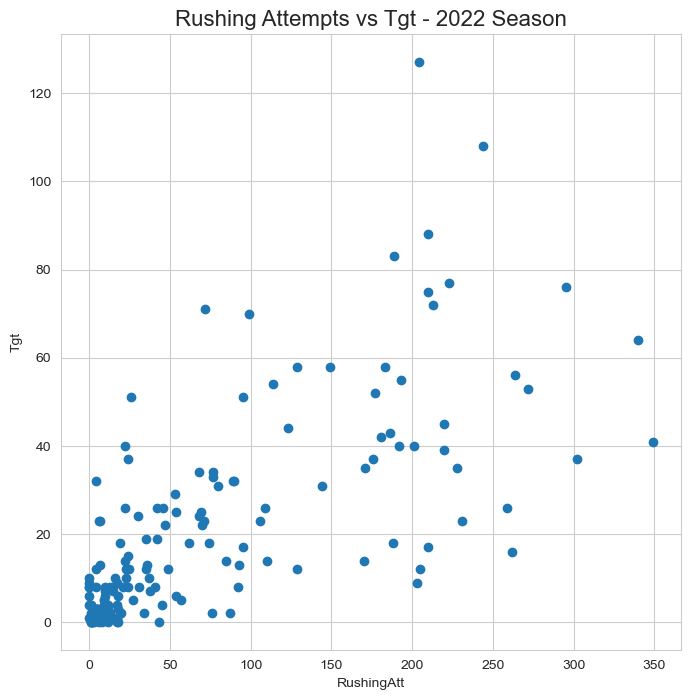

In [60]:
plt.figure(figsize=(8,8))
plt.scatter(rb_df['RushingAtt'], rb_df['Tgt'])
plt.ylabel('Tgt')
plt.xlabel('RushingAtt')
plt.title('Rushing Attempts vs Tgt - 2022 Season', fontsize=16)

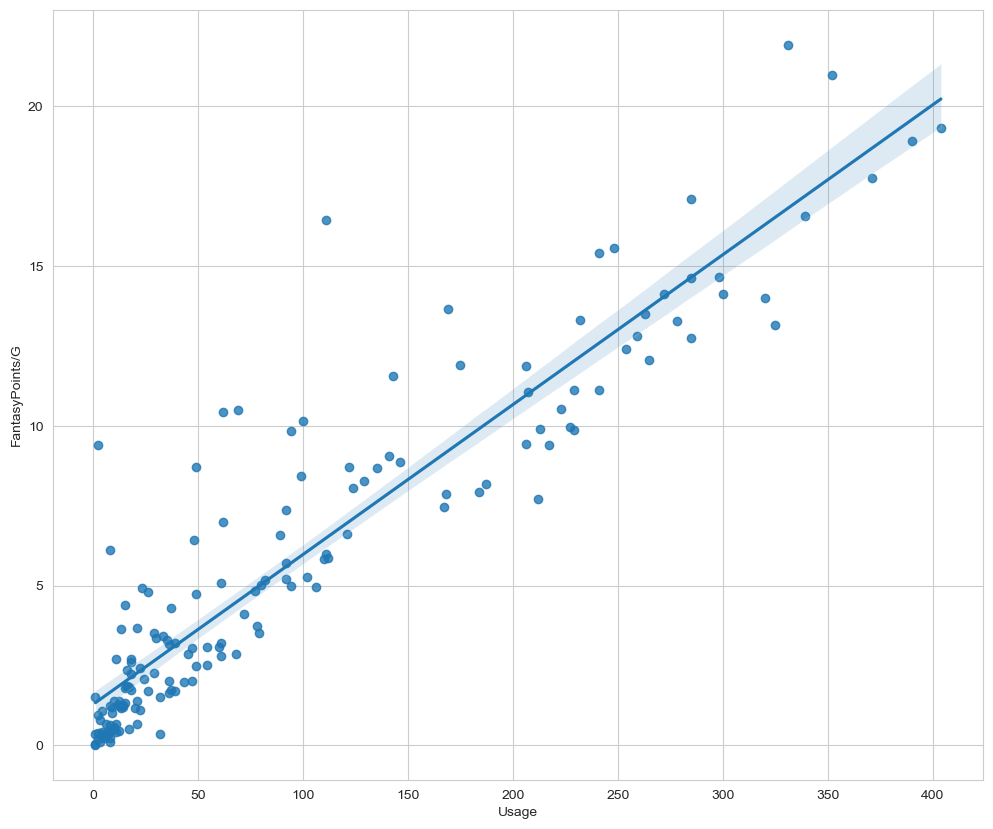

In [61]:
plt.figure(figsize=(12,10))
sns.regplot(x=rb_df['Usage'], y=rb_df['FantasyPoints/G']);

<Axes: xlabel='RushingAtt', ylabel='Density'>

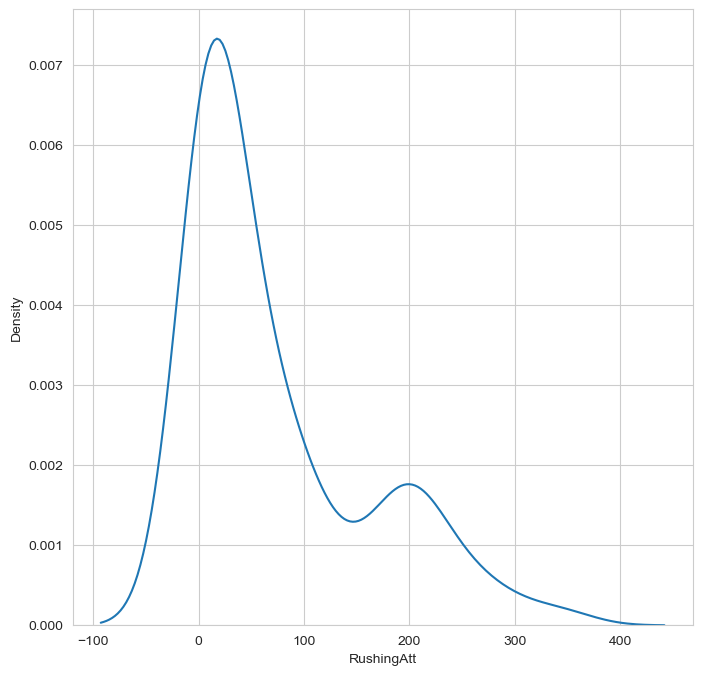

In [62]:
plt.figure(figsize=(8,8))
sns.kdeplot(rb_df['RushingAtt'])

<Axes: xlabel='Tgt', ylabel='Density'>

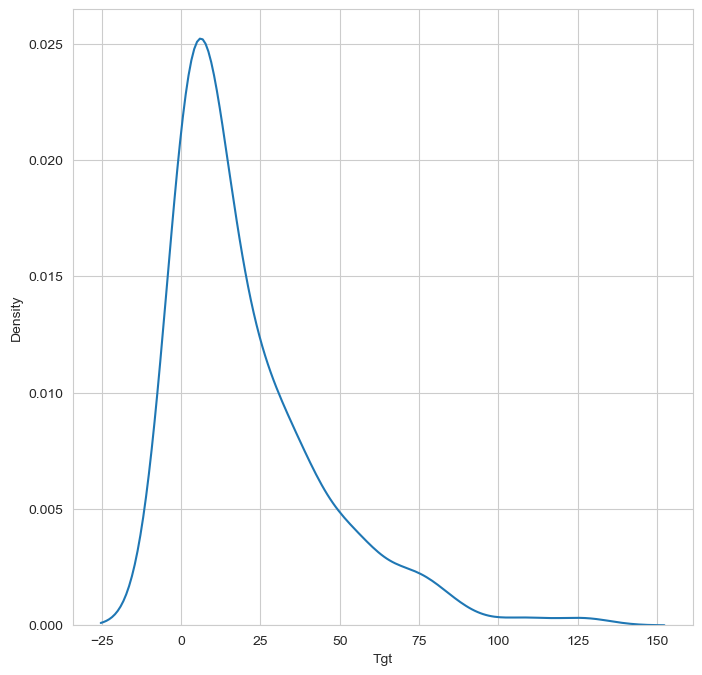

In [63]:
plt.figure(figsize=(8,8))
sns.kdeplot(rb_df['Tgt'])

<Figure size 800x800 with 0 Axes>

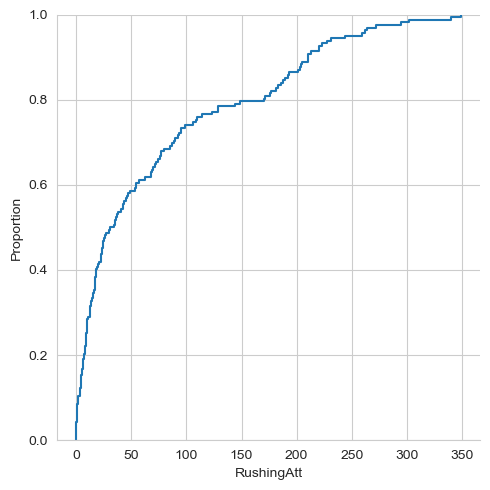

In [64]:
plt.figure(figsize=(8,8))
sns.displot(rb_df['RushingAtt'], kind='ecdf')

<Figure size 800x800 with 0 Axes>

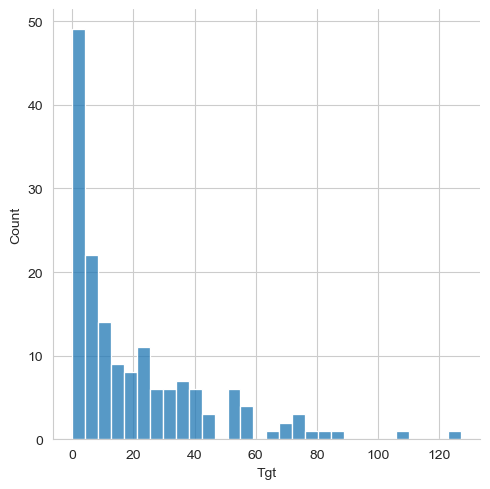

In [65]:
plt.figure(figsize=(8,8))
sns.displot(rb_df['Tgt'], bins=30)

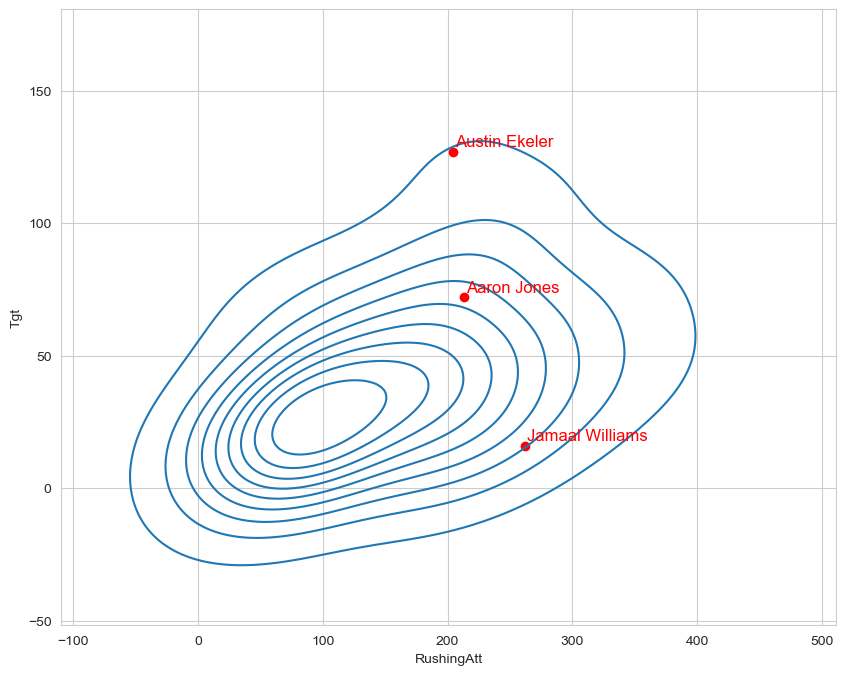

In [66]:
fig, ax = plt.subplots(figsize=(10,8))
notable_players = [
    'Austin Ekeler' , 'Aaron Jones' , 'Jamaal Williams'
]
rb_df_filtered = rb_df.loc[rb_df['RushingAtt'] > 50]

for player_name in notable_players:
    player = rb_df_filtered.loc[rb_df_filtered['Player'] == player_name]
    if not player.empty:
        target = player['Tgt']
        rushes = player['RushingAtt']
    ax.annotate(player_name, xy=(rushes+2, target+2), color='red', fontsize=12)
    ax.scatter(rushes, target, color='red')
sns.kdeplot(x=rb_df_filtered['RushingAtt'], y=rb_df_filtered['Tgt'], ax=ax, bw_method=0.7);

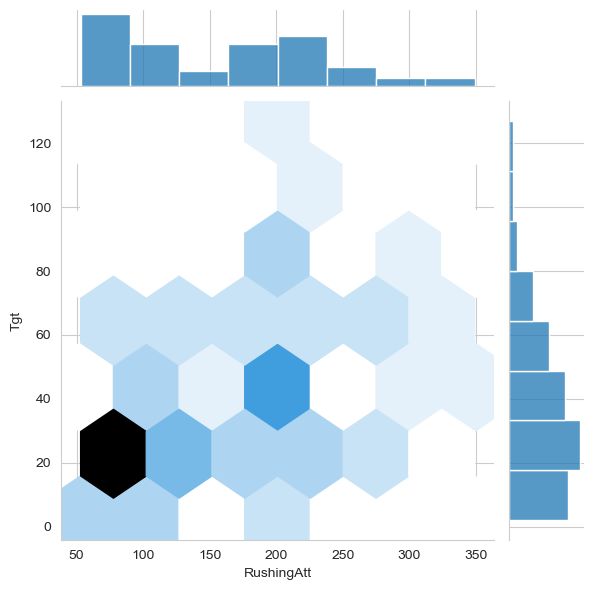

In [67]:
sns.jointplot(x=rb_df_filtered['RushingAtt'], y=rb_df_filtered['Tgt'], kind='hex', dropna=True)

Text(0.5, 1.0, 'Residual Plot')

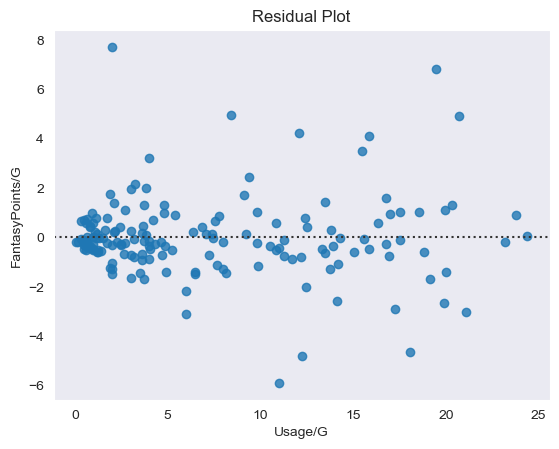

In [68]:
sns.set_style('dark')

sns.residplot(x=rb_df['Usage/G'], y=rb_df['FantasyPoints/G'])
plt.title('Residual Plot')

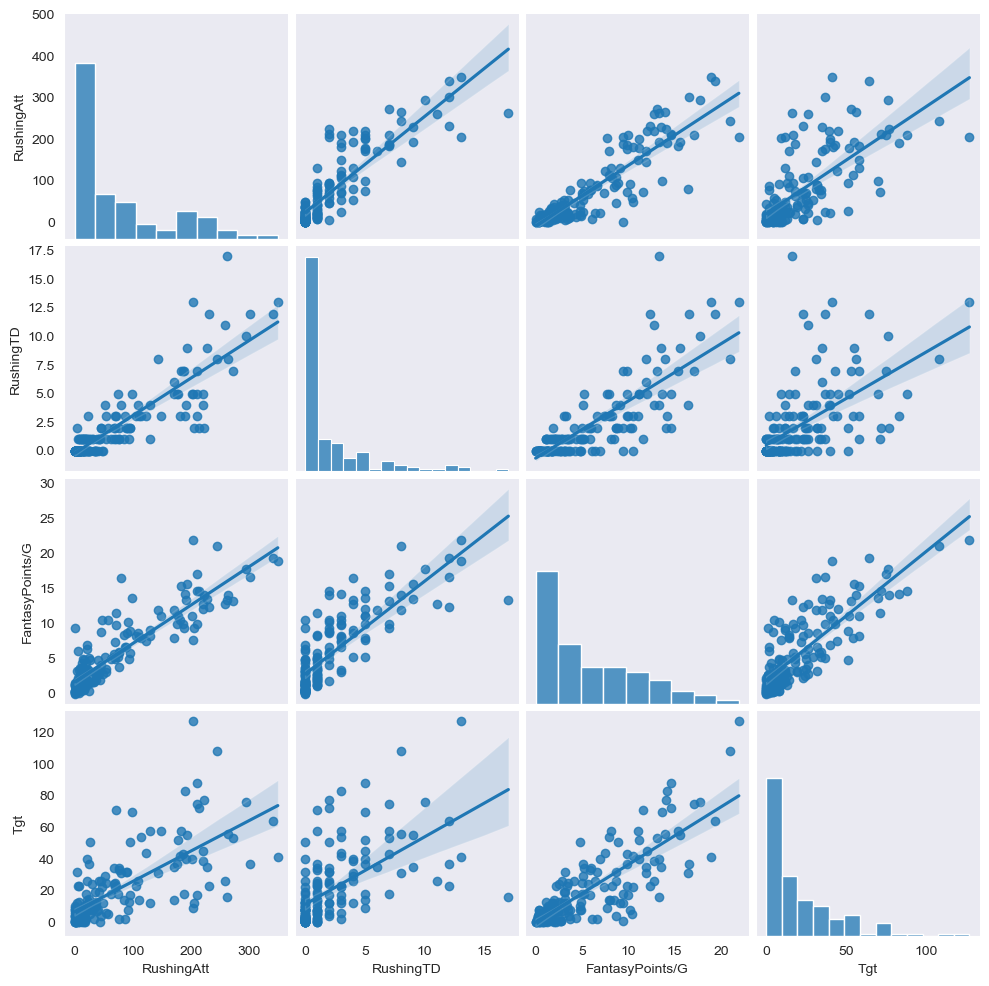

In [69]:
rb_df_copy=rb_df[['RushingAtt', 'RushingTD', 'FantasyPoints/G', 'Tgt']]

sns.pairplot(rb_df_copy, kind='reg')

In [70]:
weekly_df = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/LearnPythonWithFantasyFootball/master/2023/07-Data%20Visualizations/01-Weekly%20Fantasy%20Stats%20-%202022/weekly_df.csv')


In [71]:
allen = weekly_df.loc[weekly_df['Player'] == 'Josh Allen']
mahomes = weekly_df.loc[weekly_df['Player'] == 'Patrick Mahomes']
wilson = weekly_df.loc[weekly_df['Player'] == 'Russell Wilson']

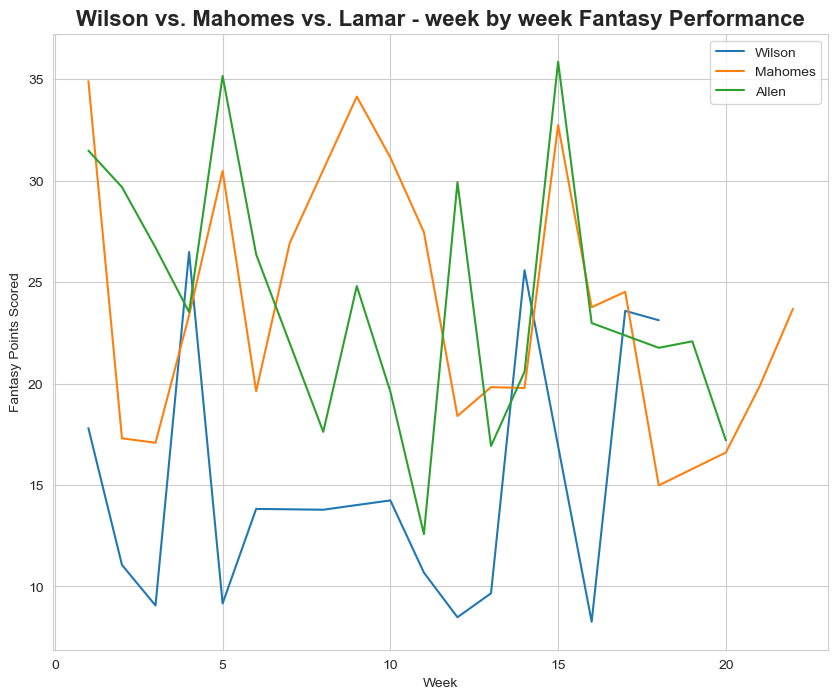

In [72]:
sns.set_style('whitegrid') # setting style
plt.subplots(figsize=(10, 8)) # setting figure size
plt.plot(wilson['Week'], wilson['StandardFantasyPoints']) # first argument is x, second is y
plt.plot(mahomes['Week'], mahomes['StandardFantasyPoints'])
plt.plot(allen['Week'], allen['StandardFantasyPoints'])
plt.legend(['Wilson', 'Mahomes', 'Allen']) # setting legend in order of how we plotted things
plt.xlabel('Week')
plt.ylabel('Fantasy Points Scored')
plt.title('Wilson vs. Mahomes vs. Lamar - week by week Fantasy Performance', fontsize=16, fontweight='bold') # adjusting font size to 16px
plt.show() # show our visualization, not completely necessary, but supresses unneccessary output from matplotlib

In [38]:
df = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/LearnPythonWithFantasyFootball/master/2023/07-Data%20Visualizations/03-Yearly%20Fantasy%20Stats%20-%202022.csv').iloc[:, 1:]


df['Usage/G'] = (df['PassingAtt'] + df['Tgt'] + df['RushingAtt'])/df['G']
df['FantasyPoints/G'] = df['FantasyPoints'] / df['G']
df.head()

,Player,Tm,Pos,Age,G,GS,Tgt,Rec,PassingYds,PassingTD,PassingAtt,PassingCmp,RushingYds,RushingTD,RushingAtt,ReceivingYds,ReceivingTD,Int,Fumbles,FumblesLost,2PM,2PP,FantasyPoints,Usage/G,FantasyPoints/G
0,Patrick Mahomes*+,KAN,QB,27,17,17,1,1,5250,41,648,435,358,4,61,6,0,12,5,0,1.0,2.0,417.4,41.764706,24.552941
1,Josh Jacobs*+,LVR,RB,24,17,17,64,53,0,0,0,0,1653,12,340,400,0,0,3,1,NaN,NaN,328.3,23.764706,19.311765
2,Christian McCaffrey*,2TM,RB,26,17,16,108,85,34,1,1,1,1139,8,244,741,5,0,1,0,NaN,NaN,356.4,20.764706,20.964706
3,Derrick Henry *,TEN,RB,28,16,16,41,33,4,1,2,2,1538,13,349,398,0,0,6,3,NaN,NaN,302.8,24.500000,18.925000
4,Justin Jefferson*+,MIN,WR,23,17,17,184,128,34,0,2,2,24,1,4,1809,8,0,0,0,1.0,NaN,368.7,11.176471,21.688235


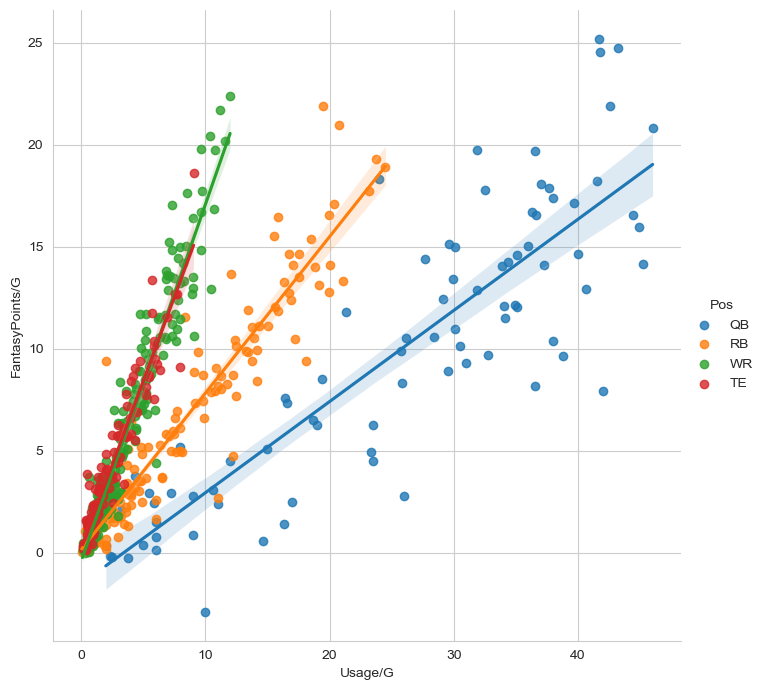

In [39]:
sns.lmplot(data=df, x='Usage/G', y='FantasyPoints/G', hue='Pos', height=7);

In [40]:
combine_df = pd.read_csv("https://raw.githubusercontent.com/fantasydatapros/LearnPythonWithFantasyFootball/master/2023/07-Data%20Visualizations/02-Combine%20Data%202000%20to%202023.csv")
combine_df.head()

,Year,DraftTeam,DraftRound,DraftOverallPick`,PFRPlayerID,CFBPlayerID,Player,Pos,School,Height,Weight,40YD,BenchReps,Vertical,BroadJump,3Cone,Shuttle
0,2000,New York Jets,1.0,13.0,AbraJo00,NaN,John Abraham,OLB,South Carolina,4-Jun,252.0,4.55,NaN,NaN,NaN,NaN,NaN
1,2000,Seattle Seahawks,1.0,19.0,AlexSh00,shaun-alexander-1,Shaun Alexander,RB,Alabama,Jun-00,218.0,4.58,NaN,NaN,NaN,NaN,NaN
2,2000,Kansas City Chiefs,6.0,188.0,AlfoDa20,NaN,Darnell Alford,OT,Boston Col.,4-Jun,334.0,5.56,23.0,25.0,94.0,8.48,4.98
3,2000,NaN,NaN,NaN,NaN,NaN,Kyle Allamon,TE,Texas Tech,2-Jun,253.0,4.97,NaN,29.0,104.0,7.29,4.49
4,2000,Carolina Panthers,1.0,23.0,AndeRa21,NaN,Rashard Anderson,CB,Jackson State,2-Jun,206.0,4.55,NaN,34.0,123.0,7.18,4.15


In [41]:
plt.figure(figsize=(8, 8))

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

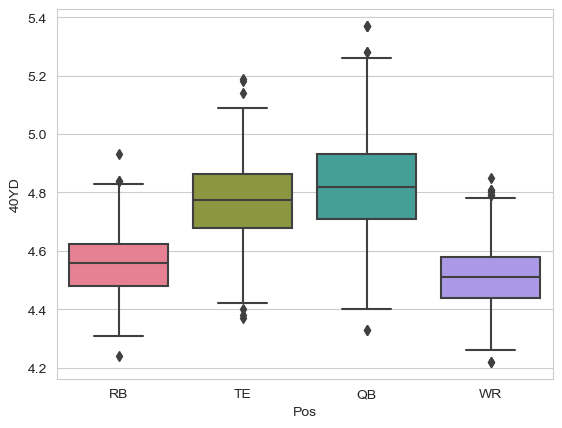

In [42]:
sns.boxplot(x='Pos', y='40YD', data=combine_df.loc[combine_df['Pos'].isin(['RB', 'QB', 'TE', 'WR'])], palette=sns.color_palette("husl", n_colors=4));